### Student Information
Name: 黃詠家 (Yung-Chia Huang)

Student ID: 112061520

GitHub ID: 102374298

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

---

## 1. Upload the Data
Since the .csv file is open using pandas libary, we don't have to do data transform to pandas dataframe.

In [3]:
### Begin Assignment Here
import pandas as pd

df = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [32]:
## This cell is used for getting familiar with the data

df.head()
# df.tail()
df[0:2]
# df[0:2][['comment', 'sentiment']]
# df['sentiment'].value_counts()

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...


In [8]:
## This cell is used for getting familiar with the data

# 1. How many rows and columns are in the dataset?
rows, columns = df.shape
print(f"1. There are {rows} rows and {columns} columns in the dataset.")

# 2. What are the column names?
print(f"2. The column names are {', '.join(df.columns)}.")

# 3. What are the data types of each column?
print("3. The data types of each column are:")
print(df.dtypes)

# 4. Are there any missing values?
missing_values = df.isnull().sum().sum()
if missing_values == 0:
    print("4. There are no missing values.")
else:
    print(f"4. There are {missing_values} missing values.")

# 5. How many unique values are in each column?
print("5. The number of unique values in each column are:")
print(df.nunique())

1. There are 1500 rows and 2 columns in the dataset.
2. The column names are sentiment, comment.
3. The data types of each column are:
sentiment    object
comment      object
dtype: object
4. There are no missing values.
5. The number of unique values in each column are:
sentiment       2
comment      1499
dtype: int64


---

## 2. Data Mining using Pandas

In [1]:
import helpers.data_mining_helpers as dmh

### 2.1 Dealing with missing value

In [5]:
# check missing values
df.isnull()

,sentiment,comment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1495,False,False
1496,False,False
1497,False,False
1498,False,False


In [4]:
# Check if the dataset contain missing values using the function check_missing_values
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [7]:
# axis=1 checks for missing values in rows
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

---
#### 2.1.1
Adding dummy series in current dataframe, and then delete the dummy series. To make sure that the function for finding missing value is reliable.

In [14]:
dummy_series = pd.Series(["dummy_record"], index=["sentiment"])
dummy_series

# Convert Series to DataFrame
dummy_series.to_frame().T

# Concatenate the DataFrames
result_with_series = pd.concat([df, dummy_series.to_frame().T], ignore_index=True)

# check if the records was commited into result
print('The length of origin data:',len(df))
print('The length with dummy series:',len(result_with_series))

The length of origin data: 1500
The length with dummy series: 1501


In [15]:
# try the function and see if it can detect that there is a missing value on the resulting dataframe.
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,1


In [18]:
# insert the dummy series into the origin dataframe
df = pd.concat([df, dummy_series.to_frame().T], ignore_index=True)

print('The length of origin data:',len(df))

df.isnull().apply(lambda x: dmh.check_missing_values(x))

The length of origin data: 1501


,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,1


In [20]:
# Remove missing values
df.dropna(inplace=True)

# check if the missing values were removed
print('The length of origin data:',len(df))
df.isnull().apply(lambda x: dmh.check_missing_values(x))

The length of origin data: 1500


,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


---
### 2.2 Dealing with duplicate data

In [24]:
# df.duplicated()
sum(df.duplicated())

1

Since the sum of duplicate result in 1, let's select `comment` columns instead of checking by all columns.

In [25]:
sum(df.duplicated('comment'))

1

In [29]:
# Find the two duplicated records
df[df.duplicated('comment',keep=False)]

,sentiment,comment
62,not nostalgia,never heard this song before... WOW What an am...
78,not nostalgia,never heard this song before... WOW What an am...


Since we already got a duplicate records, we don't have to create a dummy duplicate series and get rid of it. We just drop the duplicate record. Be aware of that we only need to delete one record, not all the record. Therefore, `keep` is set to True, so is `inplace` (changes directly on the dataframe). The default of `keep` in `drop_duplicate` is *first*, which means to keep the first duplicate and drop all the others.

In [39]:
df.drop_duplicates(inplace=True)
print('The length of origin data:',len(df))
print('The shape of the data:',df.shape)
df[62:63]

The length of origin data: 1499
The shape of the data: (1499, 2)


,sentiment,comment
62,not nostalgia,never heard this song before... WOW What an am...


---

## 3. Data Preprocessing
With section as follow:
- 3.1 Sampling
- 3.2 Feature Creation
- 3.3 Feature Subset Selection
- 3.4 Attribute transformation / Aggregation
- 3.5 Dimensionality Reduction
- 3.6 Discretization and Binarization

---
### 3.1 Sampling

In [42]:
df_sample = df.sample(n=500)
# check the length of the sample
print(len(df_sample))
# check the shape of the sample
df_sample[0:2]

500


,sentiment,comment
449,nostalgia,Wow its amazing how young I was when this was ...
914,not nostalgia,EXCELLENT percussion and horns-----I have hear...


Let's visualize and analyze the disparity between the two datasets by using `matplotlib` python library. We can see that the distribution between two datasets are similar.

In [43]:
import matplotlib.pyplot as plt
# need this line to display the plot in jupyter notebook
%matplotlib inline

In [47]:
# find the unique values of the sentiment column
sentiment = df.sentiment.unique()
print(sentiment)

['not nostalgia' 'nostalgia']


upper bound: 800
---------------------------------
sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64
---------------------------------
sentiment
not nostalgia    253
nostalgia        247
Name: count, dtype: int64


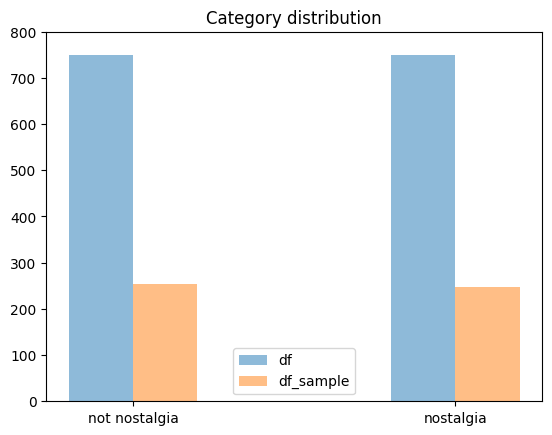

In [53]:
# The upper bound is for the plotting
upper_bound = max(df.sentiment.value_counts()) + 50
print('upper bound:',upper_bound)
print('---------------------------------')
print(df.sentiment.value_counts())
print('---------------------------------')
print(df_sample.sentiment.value_counts())

# set the starting of x axis
width = 0.2
# let df shift left with width/2 for each sentiment
X_xaxis = [x-(width/2) for x in range(len(sentiment))]
# let df_sample shift right with width/2 for each category
X_sample_xaxis = [x+(width/2) for x in range(len(sentiment))]

X_yaxis = df.sentiment.value_counts()
X_sample_yaxis = df_sample.sentiment.value_counts()

# sort the sentiment of X_yaxis and X_sample_yaxis
X_yaxis = X_yaxis[sentiment]
X_sample_yaxis = X_sample_yaxis[sentiment]

# plot barchart for df and df_sample
# plot in the order of sentiment

plt.bar(X_xaxis, X_yaxis,
        width, label = 'df', alpha = 0.5)
plt.bar(X_sample_xaxis, X_sample_yaxis,
        width, label = 'df_sample', alpha = 0.5)
plt.legend()
plt.title('Category distribution')
plt.xticks(range(len(sentiment)), sentiment, rotation = 0)
plt.ylim([0, upper_bound])
plt.show()

---
### 3.2 Feature Creation